<a href="https://colab.research.google.com/github/BioMachineLearn/BioMachineLearn/blob/main/Fabawork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
Test = pd.read_excel("dummy test.xlsx", engine="openpyxl")

In [ ]:
Test.describe()

,Yield per ha (kg),Protein,Zn,P,Mn,Fe,Mg,Ca,K,Saponins,Tannins,TPC,Temperature average (ºC),Average Rainfall: l/m2,Ph
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,3695.940625,27.993445,41.103067,4887.798741,12.250130,35.677888,1494.759930,1170.596028,9964.598721,44.914491,9.787591,2.367640,15.060725,1.497902,7.953125
std,1538.856457,2.679248,10.502520,1005.204227,5.196647,9.020477,256.015917,368.120744,1167.610807,5.980057,6.952065,0.704609,0.917918,0.558836,0.499754
min,1180.000000,22.667040,22.776881,2899.202142,6.495224,16.987823,863.046963,472.372142,5258.632954,34.991915,1.349279,0.719319,13.759901,0.797802,7.500000
25%,2485.000000,25.856565,35.003424,4207.723978,10.364482,30.197548,1354.827339,916.536615,9465.567290,41.083625,5.449759,2.085660,13.759901,0.983150,7.500000
50%,3295.833333,27.856800,38.870698,4720.381232,11.899502,35.043614,1500.100922,1179.573934,10122.388609,43.617225,7.225551,2.418964,14.832510,2.016915,7.500000
75%,4608.750000,29.763439,46.563968,5412.183924,12.830284,42.650246,1616.527002,1325.644693,10744.380026,46.255365,13.112445,2.893361,15.755311,2.018107,8.500000
max,7881.700000,35.889146,80.951899,7537.306774,48.731260,53.141284,2135.554507,2631.633354,12426.073602,66.212423,30.859531,3.977961,16.184982,2.018107,8.500000


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        128 non-null    object 
 1   Name_plant_species        128 non-null    object 
 2   Variety                   128 non-null    object 
 3   Yield per ha (kg)         128 non-null    float64
 4   Protein                   128 non-null    float64
 5   Zn                        128 non-null    float64
 6   P                         128 non-null    float64
 7   Mn                        128 non-null    float64
 8   Fe                        128 non-null    float64
 9   Mg                        128 non-null    float64
 10  Ca                        128 non-null    float64
 11  K                         128 non-null    float64
 12  Saponins                  128 non-null    float64
 13  Tannins                   128 non-null    float64
 14  TPC       

In [ ]:
scaler = StandardScaler()

numerical_cols = Test.select_dtypes(include=np.number).columns
Test_scaled = scaler.fit_transform(Test[numerical_cols])

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Test_scaled)


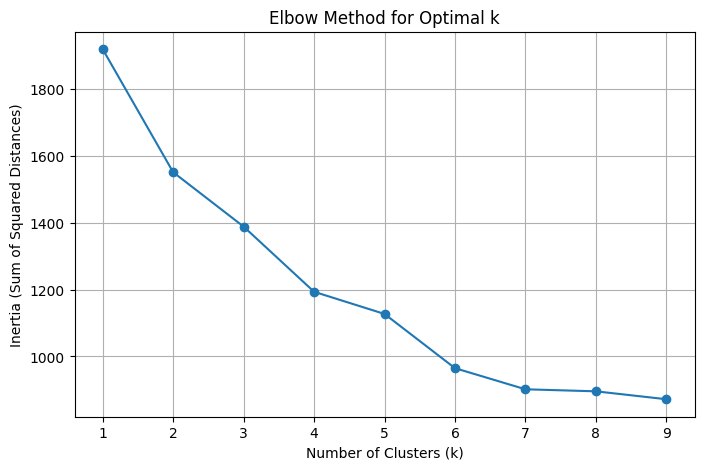

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Test_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


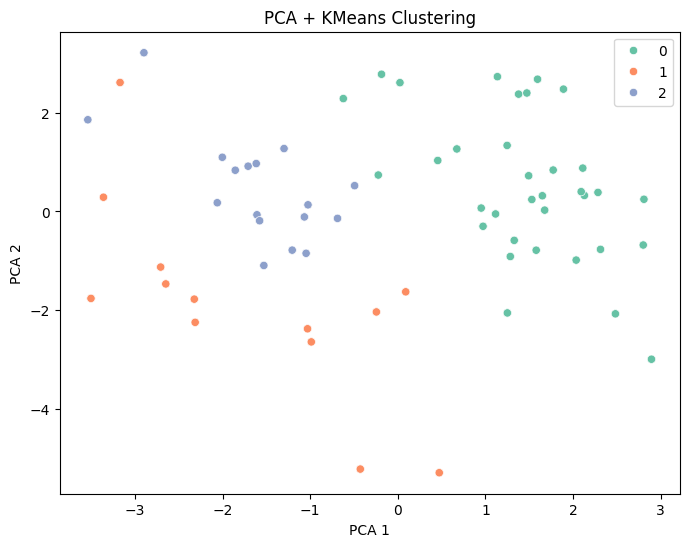

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(Test_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA + KMeans Clustering")
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Test_scaled)

# Get centroids
numerical_cols = Test.select_dtypes(include=np.number).columns
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_cols)
centroids.head()

print(centroids)

   Yield per ha (kg)  Protein         Zn         P        Mn        Fe  \
0           0.566679  0.185293 -0.382357 -0.073746 -0.075515 -0.042865   
1          -0.665295  0.265778  0.072584 -0.028146  0.245082 -0.609716   
2          -0.624602 -0.573828  0.709208  0.169015 -0.036385  0.551983   

         Mg        Ca         K  Saponins   Tannins       TPC  \
0  0.318756 -0.402737  0.010263 -0.019251  0.296578  0.305148   
1 -0.506825  0.435315 -0.595757  0.193077 -0.430388 -1.407224   
2 -0.249941  0.472585  0.435054 -0.109144 -0.264035  0.465817   

   Temperature average (ºC)  Average Rainfall: l/m2        Ph  
0                 -0.836157                0.933460  0.094165  
1                  1.193455               -1.232090  0.944062  
2                  0.759672               -0.924733 -0.910259  


- Cluster 0: High yield, high rainfall, moderate TPC. Possibly ideal growing conditions.
- Cluster 1: High protein, high temperature, alkaline soil, low TPC. Maybe drought-tolerant or stress-adapted varieties.
- Cluster 2: High Zn and K, acidic soil, moderate TPC. Could be nutrient-rich but lower yield.


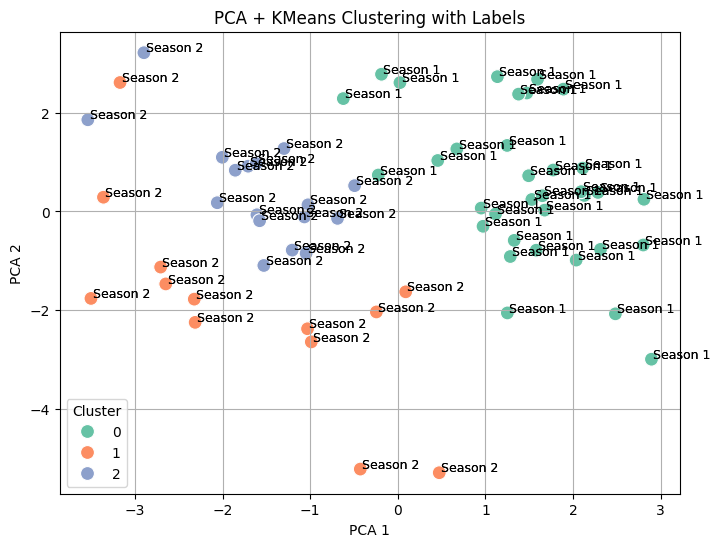

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(Test_scaled)

# Plot PCA + KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=100)

# Add cluster labels to each point
for i in range(len(X_pca)):
    plt.text(X_pca[i, 0] + 0.02, X_pca[i, 1] + 0.02, str(Test["Season"].iloc[i]), fontsize=9)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA + KMeans Clustering with Labels")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

R2: 0.8355941880081535
RMSE: 676.012380947348


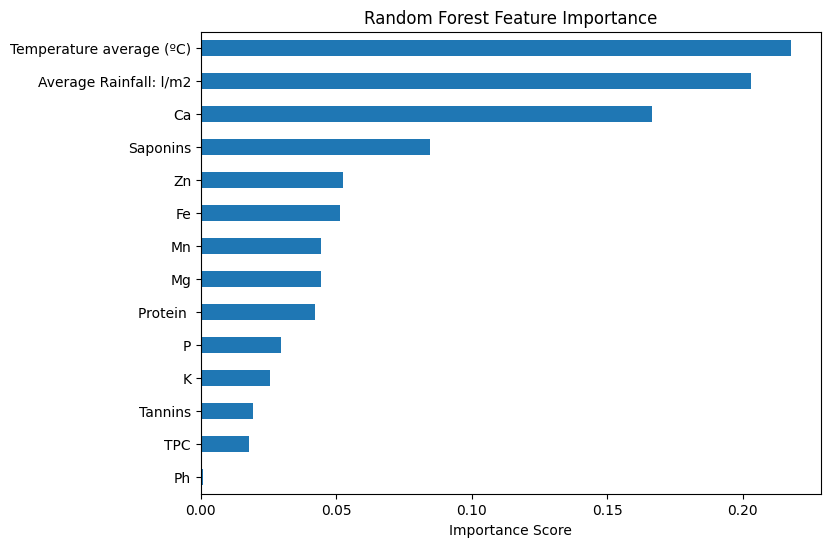

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Define features (X) and target variable (y)
# Assuming 'Yield per ha (kg)' is the target variable and other numerical columns are features
numerical_cols_for_model = Test.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_model.remove('Yield per ha (kg)')

X = Test[numerical_cols_for_model]
y = Test['Yield per ha (kg)']
# 🎓 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🔍 Predict + evaluate
y_pred = rf.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 📊 Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

# 📉 Plot feature importance
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
pip install shap

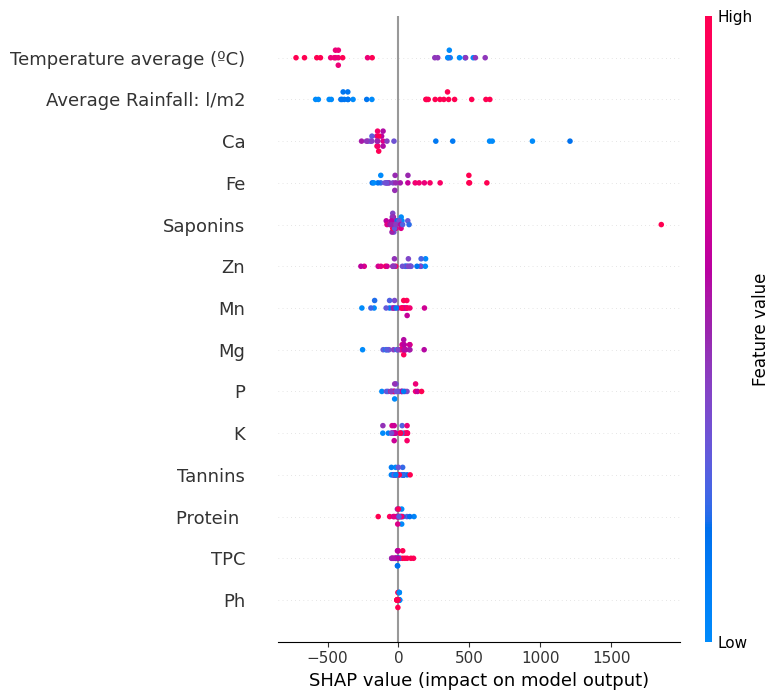

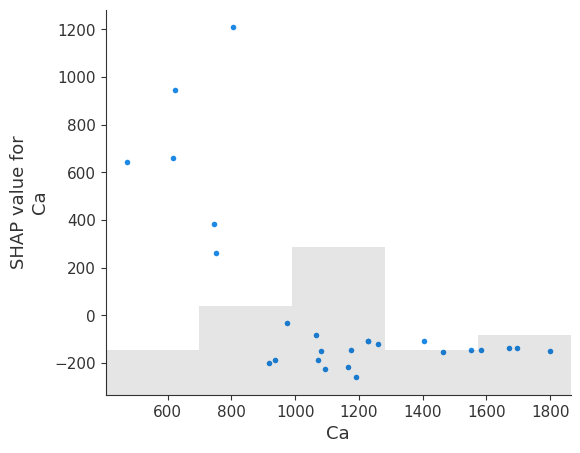

In [ ]:
import shap

# 🧠 Create SHAP explainer
explainer = shap.Explainer(rf, X_train)

# 📈 Calculate SHAP values for test set
shap_values = explainer(X_test)

# 📊 Summary plot: shows overall feature impact
shap.summary_plot(shap_values, X_test)

# 🔬 Focused plot: shows how Ca affects predictions
shap.plots.scatter(shap_values[:, "Ca"])

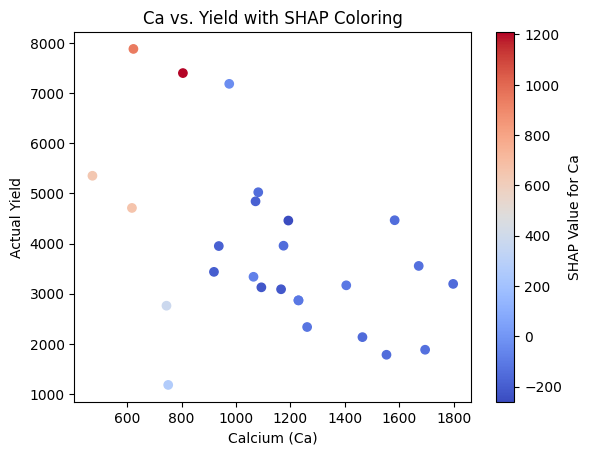

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test["Ca"], y_test, c=shap_values[:, "Ca"].values, cmap="coolwarm")
plt.xlabel("Calcium (Ca)")
plt.ylabel("Actual Yield")
plt.title("Ca vs. Yield with SHAP Coloring")
plt.colorbar(label="SHAP Value for Ca")
plt.show()

Temperature average (ºC)	Average Rainfall: l/m2

In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Fit model
model = smf.mixedlm("Q('Yield per ha (kg)') ~ Q('Temperature average (ºC)') + Q('Average Rainfall: l/m2') + Ca",
                    data=Test,
                    groups=Test["Location"])
result = model.fit()
print(result.summary())

                       Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      Q('Yield per ha (kg)')
No. Observations:      128          Method:                  REML                  
No. Groups:            2            Scale:                   1340591.5151          
Min. group size:       58           Log-Likelihood:          -1064.6243            
Max. group size:       70           Converged:               No                    
Mean group size:       64.0                                                        
-----------------------------------------------------------------------------------
                                Coef.    Std.Err.   z    P>|z|   [0.025     0.975] 
-----------------------------------------------------------------------------------
Intercept                     -13178.650 4922.042 -2.677 0.007 -22825.675 -3531.625
Q('Temperature average (ºC)')    883.921  273.245  3.235 0.001    348.371  1419.472
Q('Average Rain

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

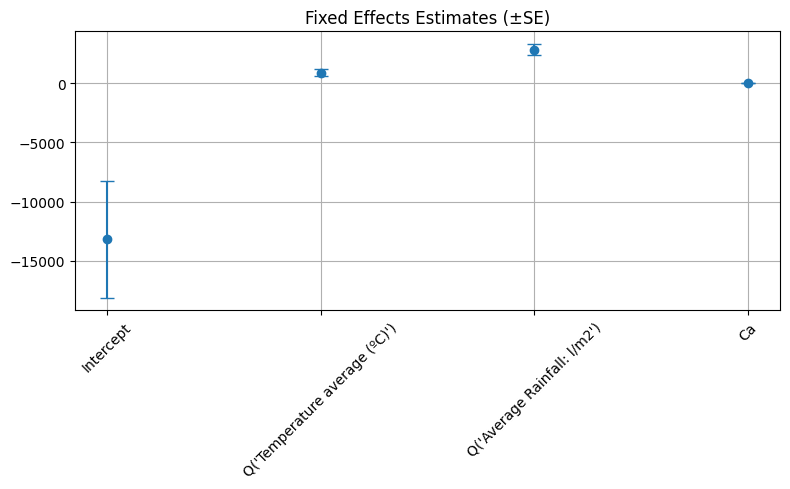

In [ ]:
coefs = result.fe_params
errors = result.bse_fe

# Plot
plt.figure(figsize=(8,5))
plt.errorbar(coefs.index, coefs.values, yerr=errors.values, fmt='o', capsize=5)
plt.xticks(rotation=45)
plt.title("Fixed Effects Estimates (±SE)")
plt.grid(True)
plt.tight_layout()
plt.show()


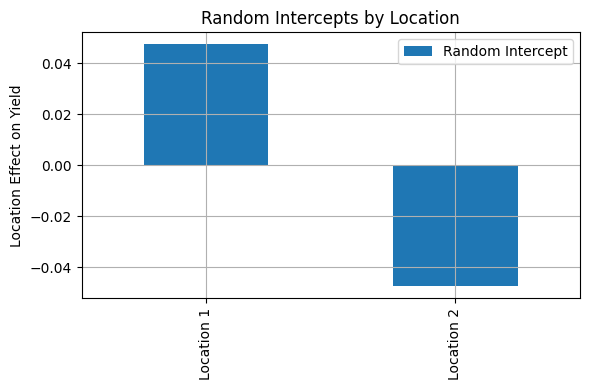

In [ ]:
re_df = pd.DataFrame(result.random_effects).T
re_df.columns = ['Random Intercept']
re_df.plot(kind='bar', title="Random Intercepts by Location", figsize=(6,4))
plt.ylabel("Location Effect on Yield")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Test["Group"] = Test["Location"] + "_" + Test["Variety"]

model = smf.mixedlm("Q('Yield per ha (kg)') ~ Q('Temperature average (ºC)') + Q('Average Rainfall: l/m2') + Ca",
                    data=Test,
                    groups=Test["Variety"])
result = model.fit()
print(result.summary())

                       Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      Q('Yield per ha (kg)')
No. Observations:      128          Method:                  REML                  
No. Groups:            6            Scale:                   1272599.7351          
Min. group size:       16           Log-Likelihood:          -1063.4680            
Max. group size:       24           Converged:               Yes                   
Mean group size:       21.3                                                        
-----------------------------------------------------------------------------------
                                Coef.    Std.Err.   z    P>|z|   [0.025     0.975] 
-----------------------------------------------------------------------------------
Intercept                     -13947.732 4852.568 -2.874 0.004 -23458.591 -4436.873
Q('Temperature average (ºC)')    917.856  268.214  3.422 0.001    392.166  1443.546
Q('Average Rain

Test which variety perform better

<Axes: xlabel='Variety', ylabel='Yield per ha (kg)'>

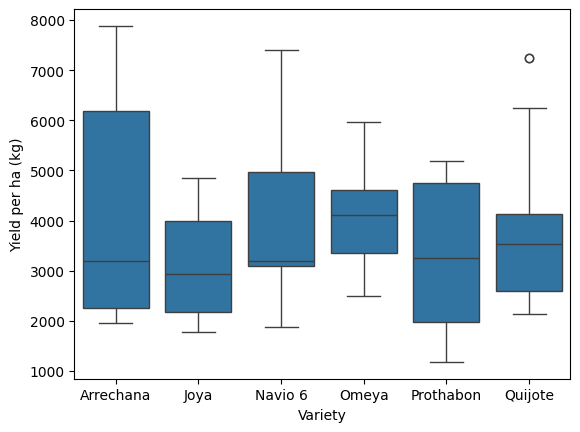

In [ ]:
import seaborn as sns
sns.boxplot(data=Test, x="Variety", y="Yield per ha (kg)")


In [ ]:
variety_effects = result.random_effects
print(variety_effects)


{'Arrechana': Group    182.208676
dtype: float64, 'Joya': Group   -259.816969
dtype: float64, 'Navio 6': Group    159.485864
dtype: float64, 'Omeya': Group    130.638003
dtype: float64, 'Prothabon': Group   -283.563427
dtype: float64, 'Quijote': Group    71.047853
dtype: float64}


In [ ]:
model = smf.mixedlm("Q('Yield per ha (kg)') ~ Q('Temperature average (ºC)') * Variety + Q('Average Rainfall: l/m2') * Variety",
                    data=Test,
                    groups=Test["Location"])
result = model.fit()
print(result.summary())

                                  Mixed Linear Model Regression Results
Model:                         MixedLM             Dependent Variable:             Q('Yield per ha (kg)')
No. Observations:              128                 Method:                         REML                  
No. Groups:                    2                   Scale:                          1208422.6251          
Min. group size:               58                  Log-Likelihood:                 -944.6243             
Max. group size:               70                  Converged:                      Yes                   
Mean group size:               64.0                                                                      
---------------------------------------------------------------------------------------------------------
                                                     Coef.     Std.Err.   z    P>|z|   [0.025     0.975] 
--------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<Axes: xlabel='PC1', ylabel='PC2'>

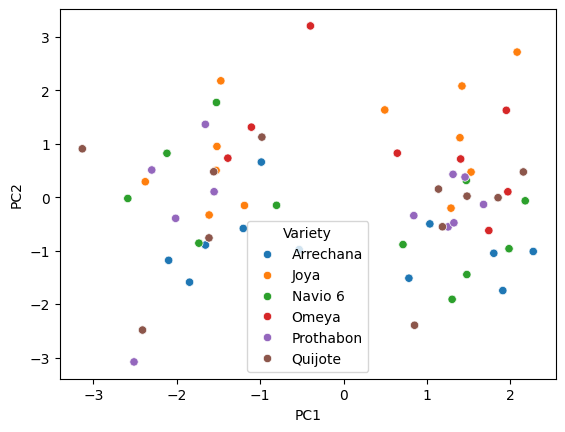

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ["Yield per ha (kg)", "Temperature average (ºC)", "Average Rainfall: l/m2", "Ca", "Fe", "Mg"]
X = StandardScaler().fit_transform(Test[features])
pca = PCA(n_components=2)
pc = pca.fit_transform(X)

Test["PC1"] = pc[:,0]
Test["PC2"] = pc[:,1]

sns.scatterplot(data=Test, x="PC1", y="PC2", hue="Variety")
